## Demo Linear regression + Qlearning

In [27]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib, os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import joblib, pathlib

### Linear regression trên từng cụm


=== Cụm 0 – cluster0.csv ===
   MSE = 0.3727


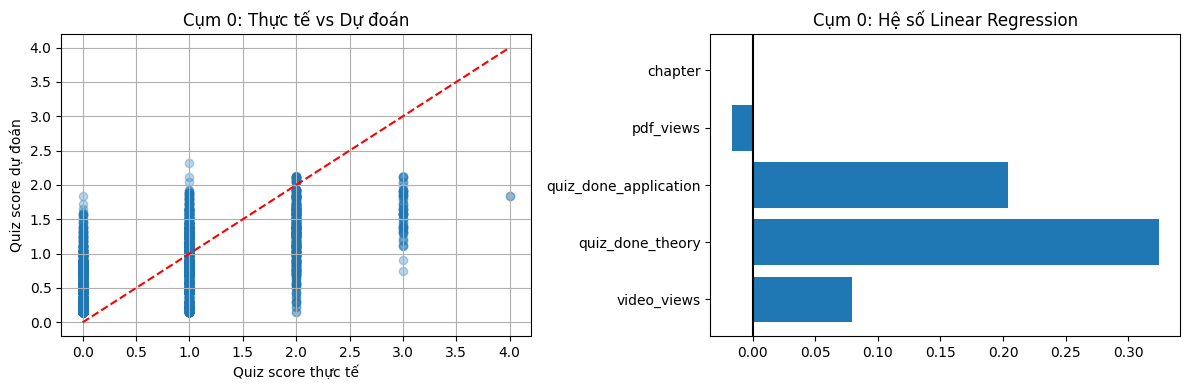


=== Cụm 1 – cluster1.csv ===
   MSE = 0.4194


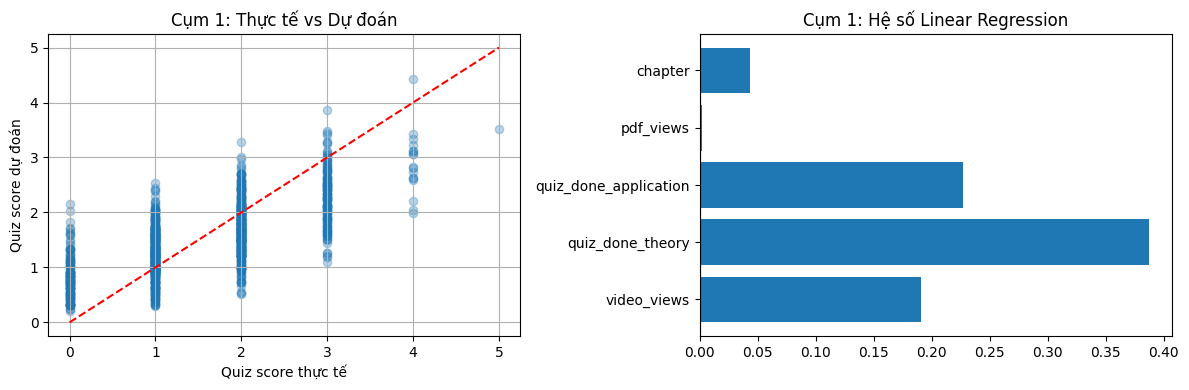


=== Cụm 2 – cluster2.csv ===
   MSE = 0.4722


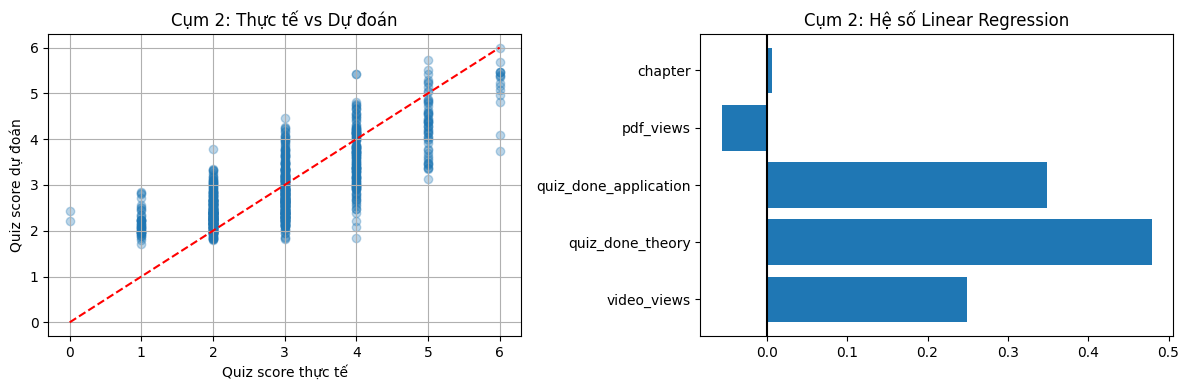

In [28]:
# --------- 1. Cấu hình chung ----------
data_dir   = pathlib.Path("data")          # thư mục chứa cluster*.csv
clusters   = [0, 1, 2]                     # ID cụm
features   = ['video_views', 'quiz_done_theory',
              'quiz_done_application', 'pdf_views', 'chapter']

# --------- 2. Vòng lặp qua từng cụm ----------
for cid in clusters:
    csv_path = data_dir / f"cluster{cid}.csv"
    print(f"\n=== Cụm {cid} – {csv_path.name} ===")

    # 2.1 Đọc dữ liệu
    df = pd.read_csv(csv_path)
    X, y = df[features], df['quiz_score']

    # 2.2 Scale + huấn luyện
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    model = LinearRegression().fit(X_scaled, y)
    mse   = mean_squared_error(y, model.predict(X_scaled))
    print(f"   MSE = {mse:.4f}")

    # 2.3 Lưu model & scaler
    joblib.dump(model,  f'reward_model_cluster{cid}.joblib')
    joblib.dump(scaler, f'reward_scaler_cluster{cid}.joblib')

    # 2.4 Vẽ biểu đồ (2 hình cạnh nhau)
    y_pred = model.predict(X_scaled)
    plt.figure(figsize=(12,4))

    # A) Scatter thực tế vs dự đoán
    plt.subplot(1,2,1)
    plt.scatter(y, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Quiz score thực tế")
    plt.ylabel("Quiz score dự đoán")
    plt.title(f"Cụm {cid}: Thực tế vs Dự đoán")
    plt.grid(True)

    # B) Biểu đồ hệ số
    plt.subplot(1,2,2)
    coef = model.coef_
    plt.barh(features, coef)
    plt.axvline(0, color='k')
    plt.title(f"Cụm {cid}: Hệ số Linear Regression")
    plt.tight_layout()
    plt.show()

### Huấn luyện model Linear Regression trên toàn bộ dữ liệu

MSE = 0.40260407567298073


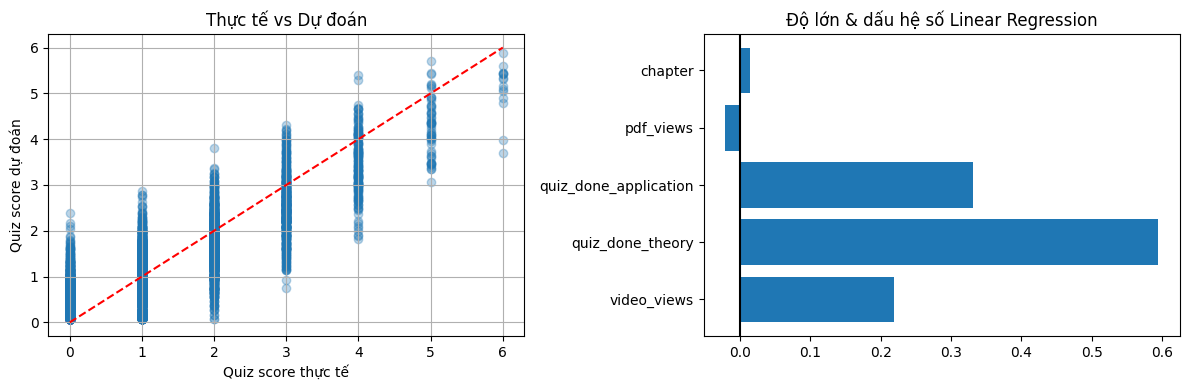

In [ ]:
# 1) Đọc dữ liệu
df = pd.read_csv("data/smart_data_full.csv")

# 2) Chọn input & output
features = ['video_views', 'quiz_done_theory',
            'quiz_done_application', 'pdf_views', 'chapter']
X        = df[features]
y        = df['quiz_score']

# 3) Scale + huấn luyện
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression().fit(X_scaled, y)
print("MSE =", mean_squared_error(y, model.predict(X_scaled)))

# 4) Lưu để tái dùng sau
joblib.dump(model,  'reward_model.joblib')
joblib.dump(scaler, 'reward_scaler.joblib')

# 5) ------------ VẼ BIỂU ĐỒ ------------
# A. Scatter: y_thật vs y_pred
y_pred = model.predict(X_scaled)
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Quiz score thực tế")
plt.ylabel("Quiz score dự đoán")
plt.title("Thực tế vs Dự đoán")
plt.grid(True)

# B. Bar chart: hệ số
plt.subplot(1,2,2)
coef = model.coef_
plt.barh(features, coef)
plt.axvline(0, color='k')
plt.title("Độ lớn & dấu hệ số Linear Regression")
plt.tight_layout()
plt.show()

### In ra phương trình linear toàn bộ dữ liệu

In [23]:
# ----- 1. Load model & scaler -----
model  = joblib.load('reward_model.joblib')
scaler = joblib.load('reward_scaler.joblib')

feature_names = ['video_views', 'quiz_done_theory',
                 'quiz_done_application', 'pdf_views', 'chapter']

w      = model.coef_            # hệ số trên biến đã chuẩn hóa
b0     = model.intercept_
mu     = scaler.mean_           # vector mean
sig    = scaler.scale_          # vector std

# ----- 2. Tính hệ số ở THANG GỐC -----
raw_coef = w / sig
raw_intercept = b0 - (w * mu / sig).sum()

# ----- 3. In công thức -----
print("★ Phương trình chuẩn hoá (dùng trong predict):")
print(f"  ŷ = {b0:.4f} " + " + ".join([f"{wi:.4f}·z_{col}" 
                                        for wi, col in zip(w, feature_names)]))

print("\n★ Phương trình THANG GỐC (dễ đọc):")
print(f"  ŷ = {raw_intercept:.4f}"
      + " + ".join([f" {ci:+.4f}·{col}"
                    for ci, col in zip(raw_coef, feature_names)]))

★ Phương trình chuẩn hoá (dùng trong predict):
  ŷ = 1.3184 0.2194·z_video_views + 0.5943·z_quiz_done_theory + 0.3316·z_quiz_done_application + -0.0204·z_pdf_views + 0.0148·z_chapter

★ Phương trình THANG GỐC (dễ đọc):
  ŷ = 0.0549 +0.0947·video_views +  +0.3011·quiz_done_theory +  +0.2694·quiz_done_application +  -0.0137·pdf_views +  +0.0089·chapter


### In ra phương trình linear trên từng cụm củ thể

In [29]:
feature_names = ['video_views', 'quiz_done_theory',
                 'quiz_done_application', 'pdf_views', 'chapter']

for cid in [0, 1, 2]:
    # ----- 1. Nạp model & scaler của từng cụm -----
    model_path  = f'reward_model_cluster{cid}.joblib'
    scaler_path = f'reward_scaler_cluster{cid}.joblib'
    model  = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    w  = model.coef_          # hệ số trên biến chuẩn hoá
    b0 = model.intercept_
    mu = scaler.mean_         # mean của từng feature
    sig= scaler.scale_        # std  của từng feature

    # ----- 2. Chuyển về thang gốc -----
    raw_coef      = w / sig
    raw_intercept = b0 - (w * mu / sig).sum()

    # ----- 3. In phương trình -----
    print(f"\n================ Cụm {cid} ================")
    print("★ Phương trình chuẩn hoá:")
    print(f"  ŷ = {b0:.4f} " +
          " + ".join(f"{wi:.4f}·z_{col}"
                     for wi, col in zip(w, feature_names)))

    print("★ Phương trình THANG GỐC:")
    print(f"  ŷ = {raw_intercept:.4f}" +
          "".join(f" {ci:+.4f}·{col}"
                  for ci, col in zip(raw_coef, feature_names)))


================ Cụm 0 ================
★ Phương trình chuẩn hoá:
  ŷ = 0.7937 0.0797·z_video_views + 0.3244·z_quiz_done_theory + 0.2037·z_quiz_done_application + -0.0169·z_pdf_views + 0.0011·z_chapter
★ Phương trình THANG GỐC:
  ŷ = 0.1541 +0.0707·video_views +0.2780·quiz_done_theory +0.2597·quiz_done_application -0.0233·pdf_views +0.0007·chapter

================ Cụm 1 ================
★ Phương trình chuẩn hoá:
  ŷ = 1.5013 0.1907·z_video_views + 0.3876·z_quiz_done_theory + 0.2269·z_quiz_done_application + 0.0020·z_pdf_views + 0.0431·z_chapter
★ Phương trình THANG GỐC:
  ŷ = -0.1322 +0.1049·video_views +0.3133·quiz_done_theory +0.2635·quiz_done_application +0.0012·pdf_views +0.0260·chapter

================ Cụm 2 ================
★ Phương trình chuẩn hoá:
  ŷ = 2.9403 0.2493·z_video_views + 0.4792·z_quiz_done_theory + 0.3490·z_quiz_done_application + -0.0560·z_pdf_views + 0.0064·z_chapter
★ Phương trình THANG GỐC:
  ŷ = 0.0596 +0.1154·video_views +0.2992·quiz_done_theory +0.26

### Hàm dự đoán điểm số cho hành động mới

In [16]:
def predict_score_for_action(action_vector):
    """
    action_vector: list gồm 5 số tương ứng với:
    [video_views, quiz_done_theory, quiz_done_application, pdf_views, chapter]
    """
    model = joblib.load('reward_model.joblib')
    scaler = joblib.load('reward_scaler.joblib')

    feature_names = ['video_views', 'quiz_done_theory', 'quiz_done_application', 'pdf_views', 'chapter']
    action_df = pd.DataFrame([action_vector], columns=feature_names)

    action_scaled = scaler.transform(action_df)
    predicted_score = model.predict(action_scaled)[0]
    return predicted_score

In [30]:
def predict_score_by_cluster(action_vector, cluster_id):
    model  = joblib.load(f'reward_model_cluster{cluster_id}.joblib')
    scaler = joblib.load(f'reward_scaler_cluster{cluster_id}.joblib')

    action_df     = pd.DataFrame([action_vector], columns=feature_names)
    action_scaled = scaler.transform(action_df)
    return model.predict(action_scaled)[0]

### Ví dụ sử dụng:

In [40]:

# train_reward_model()  # chỉ cần chạy 1 lần để huấn luyện
# Dự đoán điểm số cho 1 hành động giả định
action = [5, 8, 6, 4, 6]  # Xem 5 video, 8 quiz lý thuyết, 6 quiz ứng dụng, 4 PDF, chương 6 # “Active learner”
score = predict_score_for_action(action)
print(f"🎯 Dự đoán điểm số cho hành động tổng: {score:.2f}")               

score = predict_score_by_cluster(action, 0)
print(f"🎯 Dự đoán điểm cho cụm 0: {score:.2f}")

score = predict_score_by_cluster(action, 1)
print(f"🎯 Dự đoán điểm cho cụm 1: {score:.2f}")

score = predict_score_by_cluster(action, 2)
print(f"🎯 Dự đoán điểm cho cụm 2: {score:.2f}")

🎯 Dự đoán điểm số cho hành động tổng: 4.55
🎯 Dự đoán điểm cho cụm 0: 4.20
🎯 Dự đoán điểm cho cụm 1: 4.64
🎯 Dự đoán điểm cho cụm 2: 4.52
